<a href="https://colab.research.google.com/github/akmadan/PythonForFinance/blob/main/Loading_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Stock Data using Yahoo Finance**

**Installing yfinance and cufflinks for working with Yahoo Finance API and plotting**

In [7]:
# !pip install yfinance
# !pip install cufflinks

**Importing General Libraries**

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
sns.set()

**Importing a stock ticker data**

In [3]:
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as data


yf.pdr_override()

start = datetime.strptime('2010-01-01', '%Y-%m-%d')
end = datetime.strptime('2020-01-01', '%Y-%m-%d')

goog = data.get_data_yahoo("GOOG", start, end)

goog.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927065
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031925
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876685
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9484016


In [4]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [5]:
goog.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,643.882266,649.233024,638.298028,643.921354,643.921354,3.300117e+06
std,325.414728,328.254912,322.858643,325.706384,325.706384,2.734986e+06
min,218.336624,220.314209,216.005356,217.220810,217.220810,7.922000e+03
25%,317.889717,319.889732,314.267044,316.365440,316.365440,1.426606e+06
50%,563.677429,568.818298,557.998016,562.994751,562.994751,2.333700e+06
75%,929.634979,934.092499,923.488754,929.412491,929.412491,4.441934e+06
max,1363.349976,1365.000000,1352.670044,1361.170044,1361.170044,2.976073e+07


In [6]:
googClose = goog['Close'].head()
googClose

Date
2010-01-04    312.204773
2010-01-05    310.829926
2010-01-06    302.994293
2010-01-07    295.940735
2010-01-08    299.885956
Name: Close, dtype: float64

In [ ]:
goog.to_csv('google.csv')

**Plotting the Closing Price**

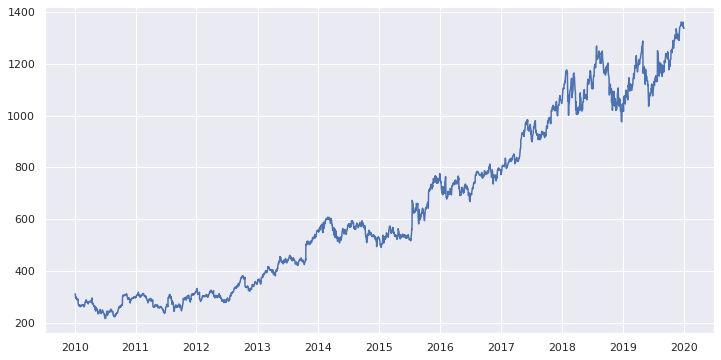

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(goog['Close'])
plt.show()

**Rolling Windows**

No handles with labels found to put in legend.


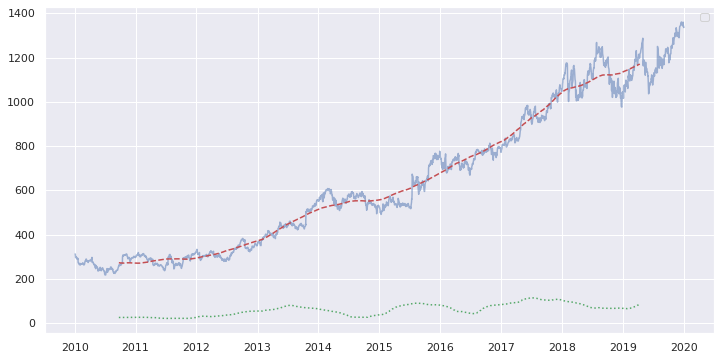

In [ ]:
rolling = goog['Close'].rolling(365, center = True) 
data  = pd.DataFrame({ 
    'input': goog['Close'], 
    'one-year rolling_mean': rolling.mean(),  ## One Year Moving Average
    'one-year rolling_std': rolling.std(), 
})
plt.figure(figsize=(12,6))
plt.plot(goog['Close'], 'b', alpha = 0.5 )
plt.plot(rolling.mean(), '--r')
plt.plot(rolling.std(), ':g',)
plt.legend()